In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
#ncep['LDC_SST_NCEP_CFSv2'] = ncep['LDC_SST_NCEP_CFSv2'] - 273.15

ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
ncep_mean = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2'].mean().reset_index()
ncep_mean.rename(columns={'LDC_SST_NCEP_CFSv2': 'MEAN_SST_NCEP_CFSv2'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
ncep_var = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2'].var().reset_index()
ncep_var.rename(columns={'LDC_SST_NCEP_CFSv2': 'VAR_SST_NCEP_CFSv2'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
ncep_mean_onetwo = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_ONETWO'].mean().reset_index()
ncep_mean_onetwo.rename(columns={'LDC_SST_NCEP_CFSv2_ONETWO': 'MEAN_SST_NCEP_CFSv2_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
ncep_var_onetwo = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_ONETWO'].var().reset_index()
ncep_var_onetwo.rename(columns={'LDC_SST_NCEP_CFSv2_ONETWO': 'VAR_SST_NCEP_CFSv2_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
ncep_mean_three = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_THREE'].mean().reset_index()
ncep_mean_three.rename(columns={'LDC_SST_NCEP_CFSv2_THREE': 'MEAN_SST_NCEP_CFSv2_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
ncep_var_three = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_THREE'].var().reset_index()
ncep_var_three.rename(columns={'LDC_SST_NCEP_CFSv2_THREE': 'VAR_SST_NCEP_CFSv2_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
ncep_mean_four = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_FOUR'].mean().reset_index()
ncep_mean_four.rename(columns={'LDC_SST_NCEP_CFSv2_FOUR': 'MEAN_SST_NCEP_CFSv2_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
ncep_var_four = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_FOUR'].var().reset_index()
ncep_var_four.rename(columns={'LDC_SST_NCEP_CFSv2_FOUR': 'VAR_SST_NCEP_CFSv2_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [ncep_mean, ncep_var,ncep_mean_onetwo, ncep_var_onetwo, ncep_mean_three, ncep_var_three, ncep_mean_four, ncep_var_four]
ncep_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep_stat['TARGET'] = ((ncep_stat['START'] + ncep_stat['L']).astype(int))%12
ncep_stat['TARGET'] = ncep_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep_stat['SZN'] = ncep_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_NCEP_CFSv2','VAR_SST_NCEP_CFSv2',
             'MEAN_SST_NCEP_CFSv2_ONETWO','VAR_SST_NCEP_CFSv2_ONETWO',
             'MEAN_SST_NCEP_CFSv2_THREE','VAR_SST_NCEP_CFSv2_THREE',
             'MEAN_SST_NCEP_CFSv2_FOUR','VAR_SST_NCEP_CFSv2_FOUR' ]
ncep_stat = ncep_stat[new_order]

ncep_stat.to_csv('../Resources/ncep_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
ncep_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep
    
ncep_stat_dfs['lead4']

,L,START,TARGET,SZN,MEAN_SST_NCEP_CFSv2,VAR_SST_NCEP_CFSv2,MEAN_SST_NCEP_CFSv2_ONETWO,VAR_SST_NCEP_CFSv2_ONETWO,MEAN_SST_NCEP_CFSv2_THREE,VAR_SST_NCEP_CFSv2_THREE,MEAN_SST_NCEP_CFSv2_FOUR,VAR_SST_NCEP_CFSv2_FOUR
0,4.5,10,2,JFM,27.274362,0.996944,27.277332,0.600251,26.759561,1.115694,28.586504,0.214782
1,4.5,11,3,FMA,27.425445,0.697347,27.777094,0.455635,27.289944,0.820607,28.470471,0.237391
2,4.5,12,4,MAM,27.756773,0.480283,27.291397,0.406723,27.574100,0.651846,28.621655,0.178971
3,4.5,1,5,AMJ,28.105807,0.272420,26.141537,0.299700,27.507644,0.365094,28.993021,0.135853
4,4.5,2,6,MJJ,27.962092,0.261228,25.050130,0.554257,27.001945,0.321105,29.130307,0.145173
5,4.5,3,7,JJA,27.598643,0.515388,24.503740,0.955050,26.494534,0.661149,28.973141,0.202964
6,4.5,4,8,JAS,26.854828,0.700295,23.782619,0.883607,25.718096,0.848134,28.547155,0.313280
7,4.5,5,9,ASO,25.866443,1.060720,23.057435,0.571022,24.771455,1.030674,27.829560,0.631121
8,4.5,6,10,SON,25.402304,1.473076,23.060556,0.364746,24.342213,1.157220,27.529989,0.966128
9,4.5,7,11,OND,25.815024,1.954842,23.683878,0.456263,24.640798,1.599894,27.962129,1.007295


In [24]:
obs = pd.read_csv('../Resources/monthly_obs.csv')

#import gfdl data
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl

#import cola data
cola_stat = pd.read_csv('../Resources/cola_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
cola_stat_dfs = {}
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola


#import canada data
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canada_stat_dfs = {}
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        rest_of_df = filtered_canada.iloc[:-1]
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    canada_stat_dfs[f'lead{lead}'] = filtered_canada

canada_stat_dfs['lead4']

,L,START,TARGET,SZN,MEAN_SST_CanSIPS_IC4,VAR_SST_CanSIPS_IC4,MEAN_SST_CanSIPS_IC4_ONETWO,VAR_SST_CanSIPS_IC4_ONETWO,MEAN_SST_CanSIPS_IC4_THREE,VAR_SST_CanSIPS_IC4_THREE,MEAN_SST_CanSIPS_IC4_FOUR,VAR_SST_CanSIPS_IC4_FOUR
0,4.5,10,2,JFM,26.097023,0.905874,26.256793,0.241265,25.887337,0.720473,27.632553,0.533346
1,4.5,11,3,FMA,26.380037,0.762024,26.560630,0.183603,26.271867,0.571100,27.696373,0.480447
2,4.5,12,4,MAM,26.671947,0.614288,26.007490,0.242830,26.358077,0.476701,27.913627,0.392899
3,4.5,1,5,AMJ,26.776723,0.317732,24.986847,0.212123,26.075800,0.274505,28.092387,0.231944
4,4.5,2,6,MJJ,26.580867,0.281106,24.003253,0.276361,25.526800,0.303385,28.106707,0.203260
5,4.5,3,7,JJA,26.284097,0.313446,23.322973,0.312749,25.053200,0.325591,28.033293,0.212512
6,4.5,4,8,JAS,26.026130,0.330067,22.946570,0.309564,24.777170,0.303339,27.946073,0.244986
7,4.5,5,9,ASO,25.952437,0.469658,22.999650,0.370625,24.769643,0.439103,27.956247,0.363529
8,4.5,6,10,SON,25.958067,0.651631,23.390953,0.359194,24.895867,0.566559,27.948097,0.534996
9,4.5,7,11,OND,26.123557,0.950080,24.017887,0.435313,25.158513,0.813856,28.074147,0.673841


KeyError: 'MEAN_SST_CanSIPS_IC3_ONETWO'

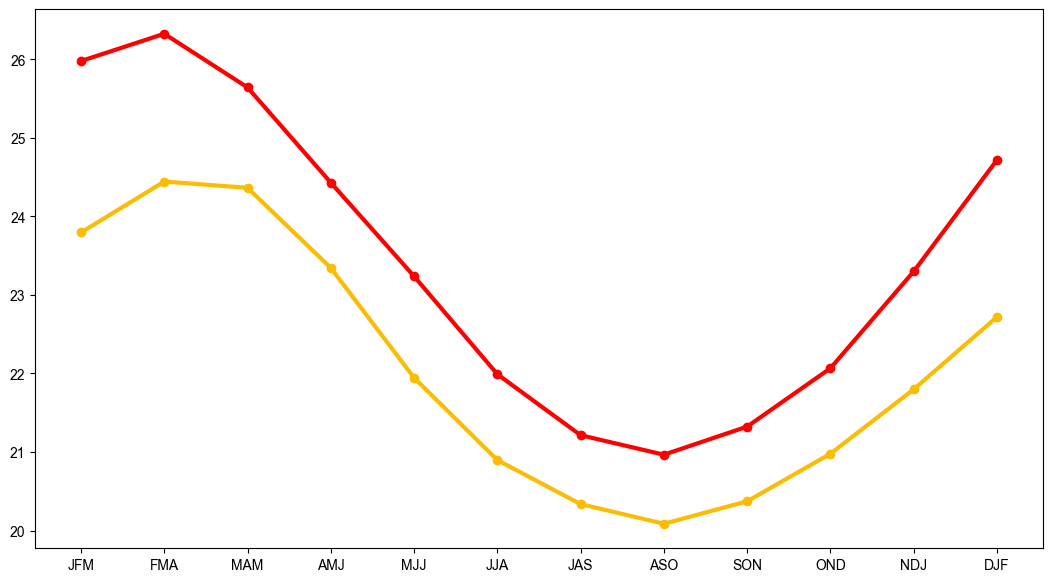

In [25]:
def multimodel_nino3_4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=19, ymax=27)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=22, ymax=28)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=25, ymax=31)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_functions = {
    '1+2': multimodel_nino1_2_visualizer,
    '3': multimodel_nino3_visualizer,
    '3.4': multimodel_nino3_4_visualizer,
    '4': multimodel_nino4_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_visualizer(region, lead):
    if region in visualizer_functions:
        visualizer_function = visualizer_functions[region]
        visualizer_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")


regions = ['1+2', '3', '3.4', '4']
leads =  [1,2,3,4,5,6,7,8,9,10]

for lead in leads:
    for region in regions:
       run_visualizer(region, lead)
 
    